In [1]:
import pandas as pd
import spacy
import os
import glob
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import plotly.express as px
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import collections
from nltk import bigrams
import dateutil
import nltk 
nltk.download()
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
import nltk
nltk.download('punkt')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
from google.colab import files
csv_files = files.upload()

Saving 2017.csv to 2017 (1).csv
Saving 2018.csv to 2018 (1).csv
Saving 2019.csv to 2019 (1).csv
Saving 2020.csv to 2020 (1).csv
Saving 2021.csv to 2021 (1).csv
Saving 2022.csv to 2022 (1).csv


In [7]:
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')
df_2020 = pd.read_csv('2020.csv')
df_2021 = pd.read_csv('2021.csv')
df_2022 = pd.read_csv('2022.csv')

In [8]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
data = pd.DataFrame()
#append all files together
for file in csv_files:
            df_temp = pd.read_csv(file)
            data = data.append(df_temp, ignore_index=True)
data

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,945814723521417217,945712432416137217,1514334777000.0,2017-12-27 00:32:57,0,NaN,@neilsiegel @Tesla Coming very soon,en,[],...,"[{'screen_name': 'neilsiegel', 'name': 'Neil S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,945749747129659392,945712432416137217,1514319285000.0,2017-12-26 20:14:45,0,NaN,@Kreative Vastly better maps/nav coming soon,en,[],...,"[{'screen_name': 'Kreative', 'name': 'Leslie',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,945748731197980672,945712432416137217,1514319043000.0,2017-12-26 20:10:43,0,NaN,@dd_hogan Ok,und,[],...,"[{'screen_name': 'dd_hogan', 'name': 'Live4EVD...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,945730195113365504,945727773493968896,1514314623000.0,2017-12-26 18:57:03,0,NaN,@Jason @Tesla Sure,en,[],...,"[{'screen_name': 'Jason', 'name': 'jason@calac...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,945729852874694656,945712432416137217,1514314542000.0,2017-12-26 18:55:42,0,NaN,"@kabirakhtar Yeah, it’s terrible. Had to upgra...",en,[],...,"[{'screen_name': 'kabirakhtar', 'name': 'kabir...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29619,NaN,1477775713172402176,1477775713172402176,2022-01-03 02:56:00 Arabian Standard Time,2022-01-03,400,NaN,https://t.co/LA9hPzVlGx,und,[],...,[],NaN,NaN,NaN,NaN,02:56:00,[],25611.0,51383.0,473530.0
29620,NaN,1477706142461706248,1477706142461706248,2022-01-02 22:19:33 Arabian Standard Time,2022-01-02,400,NaN,Let’s make the roaring 20’s happen!,en,[],...,[],NaN,NaN,NaN,NaN,22:19:33,[],22500.0,26951.0,320201.0
29621,NaN,1477700424933253123,1477700424933253123,2022-01-02 21:56:50 Arabian Standard Time,2022-01-02,400,NaN,Great work by Tesla team worldwide!,en,[],...,[],NaN,NaN,NaN,NaN,21:56:50,[],5630.0,4459.0,66405.0
29622,NaN,1477096955658579974,1476958174439567360,2022-01-01 05:58:52 Arabian Standard Time,2022-01-01,400,NaN,@BLKMDL3 @Tesla 🔥,und,[],...,"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...",NaN,NaN,NaN,NaN,05:58:52,[],1074.0,472.0,45704.0


In [16]:
data = data[['date','tweet']].copy(deep =True)
data

,date,tweet
0,2017-12-27 00:32:57,@neilsiegel @Tesla Coming very soon
1,2017-12-26 20:14:45,@Kreative Vastly better maps/nav coming soon
2,2017-12-26 20:10:43,@dd_hogan Ok
3,2017-12-26 18:57:03,@Jason @Tesla Sure
4,2017-12-26 18:55:42,"@kabirakhtar Yeah, it’s terrible. Had to upgra..."
...,...,...
29619,2022-01-03,https://t.co/LA9hPzVlGx
29620,2022-01-02,Let’s make the roaring 20’s happen!
29621,2022-01-02,Great work by Tesla team worldwide!
29622,2022-01-01,@BLKMDL3 @Tesla 🔥


In [17]:
#defining a function for data(tweet) cleaning 
def clean(tweet):
  '''
  ARGS: Tweet data from the dataset is cleaned for much easier computation
  Returns: Cleaned data
  '''
  # Eliminating account references or & symbols or hashtags if any
  tweet = re.sub("[@&#][A-Za-z0-9_]+"," ", tweet.lower())
    
    
  # Eliminating web links if any
  tweet = re.sub(r'http\S+', ' ', tweet)
  tweet = re.sub(r"www.\S+", " ", tweet)
    
  # Eliminating punctuation if any
  tweet = re.sub('[()!?]', ' ', tweet)
  tweet = re.sub('\[.*?\]',' ', tweet)
    
  # Eliminating any characters which are not alphanumeric
  tweet = re.sub("[^a-z0-9]"," ", tweet)
    
  #Eliminating numbers if any
  tweet = re.sub(r'[0-9]+', ' ', tweet)

  # Word tokenization and stop word elimination
  
  word_tokens = word_tokenize(tweet)
  filtered_sentence = [w for w in word_tokens if not w in set(stopwords.words("english"))]

  if len(filtered_sentence)==0:
    return float('NaN')
  else:
    return ' '.join(filtered_sentence)

In [18]:
#date formatting function
def date_formatting(date):
    return dateutil.parser.parse(date)

In [19]:
data['tweet']=data['tweet'].apply(clean)
data['date']=data['date'].apply(date_formatting)

In [20]:
# extracting year from date function
def year(date):
    return date.year

In [21]:
data['year'] = data['date'].apply(year)

In [22]:
#filtering out null rows
data = data[data['tweet'].notna()]

In [23]:
def frequency(document):
    return nltk.FreqDist(document)

In [25]:
#computing word frequency of each year
# Calculating word  frequencies across each year
freq_2017= frequency(word_tokenize(' '.join(data[data['year']==2017]['tweet'])))
freq_2018= frequency(word_tokenize(' '.join(data[data['year']==2018]['tweet'])))
freq_2019= frequency(word_tokenize(' '.join(data[data['year']==2019]['tweet'])))
freq_2020= frequency(word_tokenize(' '.join(data[data['year']==2020]['tweet'])))
freq_2021= frequency(word_tokenize(' '.join(data[data['year']==2021]['tweet'])))
freq_2022= frequency(word_tokenize(' '.join(data[data['year']==2022]['tweet'])))

In [28]:
# Top 10 words for the year 2017 by elon musk
df_tweets_2017 = pd.DataFrame(freq_2017.items(),columns =['word','Frequency']).sort_values(['Frequency'],ascending =False)
df_tweets_2017.head(10)

,word,Frequency
104,tesla,222
56,model,177
156,yes,162
64,good,159
37,like,147
62,one,138
16,first,129
52,next,129
8,yeah,117
113,would,108


In [29]:
# Top 10 words for the year 2018 by elon musk
df_tweets_2018 = pd.DataFrame(freq_2018.items(),columns =['word','Frequency']).sort_values(['Frequency'],ascending =False)
df_tweets_2018.head(10)

,word,Frequency
1,tesla,877
112,car,363
28,yes,324
187,good,308
134,model,294
102,like,285
285,would,231
70,people,222
206,even,195
64,next,192


In [30]:
# Top 10 words for the year 2019 by elon musk
df_tweets_2019 = pd.DataFrame(freq_2019.items(),columns =['word','Frequency']).sort_values(['Frequency'],ascending =False)
df_tweets_2019.head(10)

,word,Frequency
195,tesla,504
106,yes,307
55,would,198
191,great,193
162,starship,189
487,like,170
42,good,169
360,high,148
51,much,144
206,time,141


In [31]:
# Top 10 words for the year 2020 by elon musk
df_tweets_2020 = pd.DataFrame(freq_2020.items(),columns =['word','Frequency']).sort_values(['Frequency'],ascending =False)
df_tweets_2020.head(10)

,word,Frequency
11,tesla,191
74,yes,160
25,great,128
200,much,120
51,good,112
393,would,94
339,high,91
125,sure,88
208,yeah,83
126,haha,83


In [32]:
# Top 10 words for the year 2021 by elon musk
df_tweets_2021 = pd.DataFrame(freq_2021.items(),columns =['word','Frequency']).sort_values(['Frequency'],ascending =False)
df_tweets_2021.head(10)

,word,Frequency
48,tesla,213
65,great,102
143,good,98
111,much,93
156,would,89
96,haha,89
117,like,89
32,time,86
807,beta,77
927,high,74


In [33]:
# Top 10 words for the year 2022 by elon musk
df_tweets_2022 = pd.DataFrame(freq_2022.items(),columns =['word','Frequency']).sort_values(['Frequency'],ascending =False)
df_tweets_2022.head(10)

,word,Frequency
63,tesla,62
54,people,34
60,would,32
107,yes,32
245,one,30
323,good,28
7,starlink,28
158,car,26
686,true,22
134,high,22


In [35]:
#histogram for 2017 tweets
px.histogram(df_tweets_2017, x ='Frequency', nbins =20)

In [36]:
#histogram for 2018 tweets
px.histogram(df_tweets_2018, x ='Frequency', nbins =20)

In [37]:
#histogram for 2019 tweets
px.histogram(df_tweets_2019, x ='Frequency', nbins =20)

In [38]:
#histogram for 2020 tweets
px.histogram(df_tweets_2020, x ='Frequency', nbins =20)

In [39]:
#histogram for 2021 tweets
px.histogram(df_tweets_2021, x ='Frequency', nbins =20)

In [40]:
#histogram for 2022 tweets
px.histogram(df_tweets_2022, x ='Frequency', nbins =20)

Zipf’s law and plot log-log plots of word frequencies and rank for each year
(Zipf's Law states that the frequency of the word is inversely proportional to the rank)

In [41]:
# As the dataframes are all sorted in descending order adding a rank column to the dataframes

df_tweets_2017['rank'] = range(1,len(df_tweets_2017)+1)
df_tweets_2018['rank'] = range(1,len(df_tweets_2018)+1)
df_tweets_2019['rank'] = range(1,len(df_tweets_2019)+1)
df_tweets_2020['rank'] = range(1,len(df_tweets_2020)+1)
df_tweets_2021['rank'] = range(1,len(df_tweets_2021)+1)
df_tweets_2022['rank'] = range(1,len(df_tweets_2022)+1)

Text(0, 0.5, 'Rank')

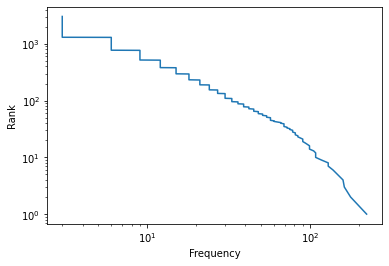

In [42]:
# 2017 loglog plot
plt.loglog(df_tweets_2017['Frequency'], df_tweets_2017['rank'])
plt.xlabel('Frequency')
plt.ylabel('Rank')

Text(0, 0.5, 'Rank')

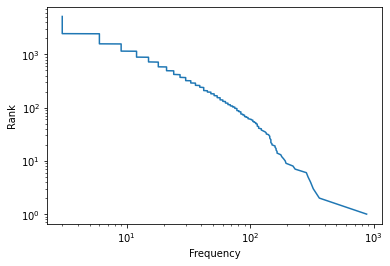

In [43]:
# 2018 loglog plot
plt.loglog(df_tweets_2018['Frequency'], df_tweets_2018['rank'])
plt.xlabel('Frequency')
plt.ylabel('Rank')

Text(0, 0.5, 'Rank')

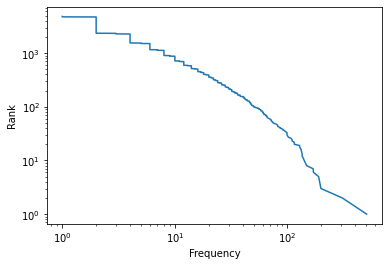

In [44]:
# 2019 loglog plot
plt.loglog(df_tweets_2019['Frequency'], df_tweets_2019['rank'])
plt.xlabel('Frequency')
plt.ylabel('Rank')

Text(0, 0.5, 'Rank')

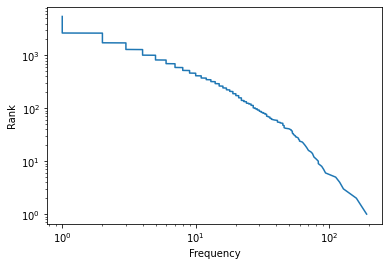

In [45]:
# 2020 loglog plot
plt.loglog(df_tweets_2020['Frequency'], df_tweets_2020['rank'])
plt.xlabel('Frequency')
plt.ylabel('Rank')

Text(0, 0.5, 'Rank')

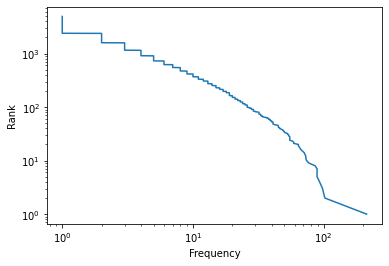

In [46]:
# 2021 loglog plot
plt.loglog(df_tweets_2021['Frequency'], df_tweets_2021['rank'])
plt.xlabel('Frequency')
plt.ylabel('Rank')

Text(0, 0.5, 'Rank')

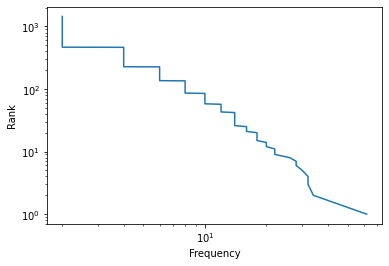

In [47]:
# 2022 loglog plot
plt.loglog(df_tweets_2022['Frequency'], df_tweets_2022['rank'])
plt.xlabel('Frequency')
plt.ylabel('Rank')

BIGRAM NETWORK GRAPHS FOR EACH YEAR

In [49]:
data = data[['date','tweet','year']].copy(deep =True)
data

,date,tweet,year
0,2017-12-27 00:32:57,coming soon,2017
1,2017-12-26 20:14:45,vastly better maps nav coming soon,2017
2,2017-12-26 20:10:43,ok,2017
3,2017-12-26 18:57:03,sure,2017
4,2017-12-26 18:55:42,yeah terrible upgrade old linux os bunch drive...,2017
...,...,...,...
29616,2022-01-03 00:00:00,reminds hex edited ultima v get final maze,2022
29617,2022-01-03 00:00:00,yay switzerland,2022
29618,2022-01-03 00:00:00,way touch voters three generations away voting...,2022
29620,2022-01-02 00:00:00,let make roaring happen,2022


In [50]:
# Tokenization of the tweets
def token(string):
    return word_tokenize(string)

In [51]:
data['Tokens'] = data['tweet'].apply(token)

In [54]:
# Extracting bi-grams for the year 2017
bigrams_network = [list(bigrams(tweet)) for tweet in data[data['year']==2017]['Tokens']]
bigrams_network

[[('coming', 'soon')],
 [('vastly', 'better'),
  ('better', 'maps'),
  ('maps', 'nav'),
  ('nav', 'coming'),
  ('coming', 'soon')],
 [],
 [],
 [('yeah', 'terrible'),
  ('terrible', 'upgrade'),
  ('upgrade', 'old'),
  ('old', 'linux'),
  ('linux', 'os'),
  ('os', 'bunch'),
  ('bunch', 'drivers'),
  ('drivers', 'first'),
  ('first', 'major'),
  ('major', 'browser'),
  ('browser', 'upgrades'),
  ('upgrades', 'coming'),
  ('coming', 'cars'),
  ('cars', 'months'),
  ('months', 'note'),
  ('note', 'slower'),
  ('slower', 'first'),
  ('first', 'code'),
  ('code', 'optimized')],
 [('similar', 'total'),
  ('total', 'size'),
  ('size', 'maybe'),
  ('maybe', 'slightly'),
  ('slightly', 'bigger'),
  ('bigger', 'account'),
  ('account', 'really'),
  ('really', 'gamechanging'),
  ('gamechanging', 'think'),
  ('think', 'feature'),
  ('feature', 'like'),
  ('like', 'add')],
 [('sustainable', 'energy'),
  ('energy', 'production'),
  ('production', 'solar'),
  ('solar', 'batteries'),
  ('batteries', 'gr

In [55]:
# Flatten list of bigrams in clean tweets
list_bigrams = list(itertools.chain(*bigrams_network))
# Create counter of words in clean bigrams
counts_bigrams = collections.Counter(list_bigrams)

In [57]:
# Creating a bigram dataframe
df_bigram = pd.DataFrame(counts_bigrams.most_common(20),
                             columns=['bigram', 'count'])
df_bigram

,bigram,count
0,"(coming, soon)",45
1,"(falcon, heavy)",45
2,"(boring, company)",39
3,"(next, year)",30
4,"(good, point)",27
5,"(model, x)",27
6,"(next, week)",24
7,"(next, month)",21
8,"(boring, machine)",18
9,"(tesla, semi)",18


In [58]:
#creating a dictionary of the year 2017
dictionary_bigram=df_bigram.set_index('bigram').T.to_dict('records')

In [60]:
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in dictionary_bigram[0].items():
    G.add_edge(k[0], k[1])

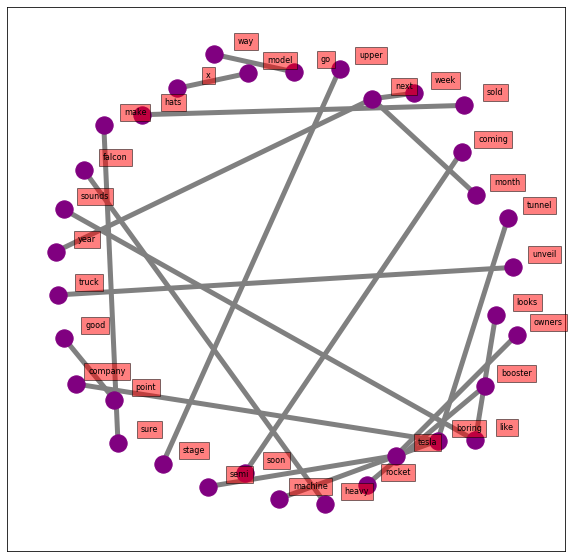

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=5,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.50),
            horizontalalignment='center', fontsize=8)
    
plt.show()

In [63]:
# Extracting bi-grams for the year 2018
bigram_networks = [list(bigrams(tweet)) for tweet in data[data['year']==2018]['Tokens']]

In [64]:
# Flatten list of bigrams in clean tweets
list_bigrams = list(itertools.chain(*bigrams_network))
# Create counter of words in clean bigrams
counts_bigrams = collections.Counter(list_bigrams)

In [66]:
# Creating a bigram dataframe
df_bigram = pd.DataFrame(counts_bigrams.most_common(20),
                             columns=['bigram', 'count'])
df_bigram

,bigram,count
0,"(coming, soon)",45
1,"(falcon, heavy)",45
2,"(boring, company)",39
3,"(next, year)",30
4,"(good, point)",27
5,"(model, x)",27
6,"(next, week)",24
7,"(next, month)",21
8,"(boring, machine)",18
9,"(tesla, semi)",18


In [67]:
#creating a dictionary of the year 2018
dictionary_bigram=df_bigram.set_index('bigram').T.to_dict('records')

In [69]:
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in dictionary_bigram[0].items():
    G.add_edge(k[0], k[1])

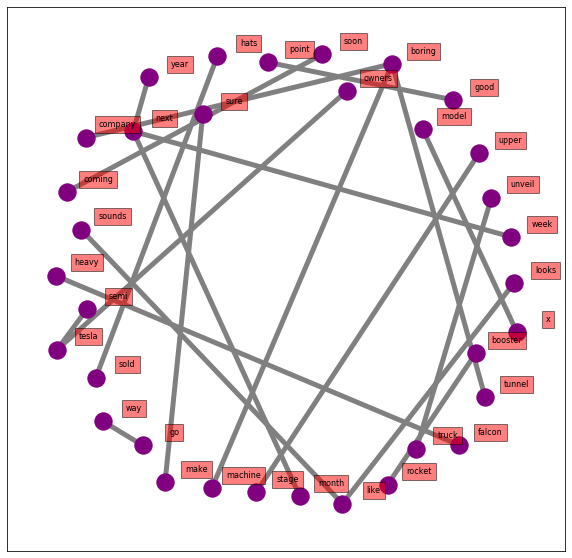

In [70]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=5,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.50),
            horizontalalignment='center', fontsize=8)
    
plt.show()

In [71]:
# Extracting bi-grams for the year 2019
bigram_networks = [list(bigrams(tweet)) for tweet in data[data['year']==2019]['Tokens']]

In [72]:
# Flatten list of bigrams in clean tweets
list_bigrams = list(itertools.chain(*bigrams_network))
# Create counter of words in clean bigrams
counts_bigrams = collections.Counter(list_bigrams)

In [74]:
# Creating a bigram dataframe
df_bigram = pd.DataFrame(counts_bigrams.most_common(20),
                             columns=['bigram', 'count'])
df_bigram

,bigram,count
0,"(coming, soon)",45
1,"(falcon, heavy)",45
2,"(boring, company)",39
3,"(next, year)",30
4,"(good, point)",27
5,"(model, x)",27
6,"(next, week)",24
7,"(next, month)",21
8,"(boring, machine)",18
9,"(tesla, semi)",18


In [75]:
#creating the dictionary of the year 2019
dictionary_bigram=df_bigram.set_index('bigram').T.to_dict('records')

In [77]:
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in dictionary_bigram[0].items():
    G.add_edge(k[0], k[1])

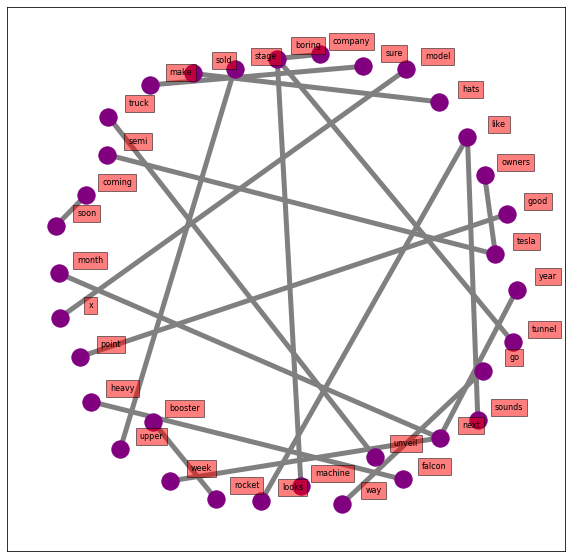

In [78]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=5,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.50),
            horizontalalignment='center', fontsize=8)
    
plt.show()

In [80]:
#Extracting bi-grams for the year 2020
bigram_networks = [list(bigrams(tweet)) for tweet in data[data['year']==2020]['Tokens']]

In [81]:
# Flatten list of bigrams in clean tweets
list_bigrams = list(itertools.chain(*bigrams_network))
# Create counter of words in clean bigrams
counts_bigrams = collections.Counter(list_bigrams)

In [83]:
# Creating a bigram dataframe
df_bigram = pd.DataFrame(counts_bigrams.most_common(20),
                             columns=['bigram', 'count'])
df_bigram

,bigram,count
0,"(coming, soon)",45
1,"(falcon, heavy)",45
2,"(boring, company)",39
3,"(next, year)",30
4,"(good, point)",27
5,"(model, x)",27
6,"(next, week)",24
7,"(next, month)",21
8,"(boring, machine)",18
9,"(tesla, semi)",18


In [84]:
#creating a dictionary of the year 2020
dictionary_bigram=df_bigram.set_index('bigram').T.to_dict('records')

In [86]:
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in dictionary_bigram[0].items():
    G.add_edge(k[0], k[1])

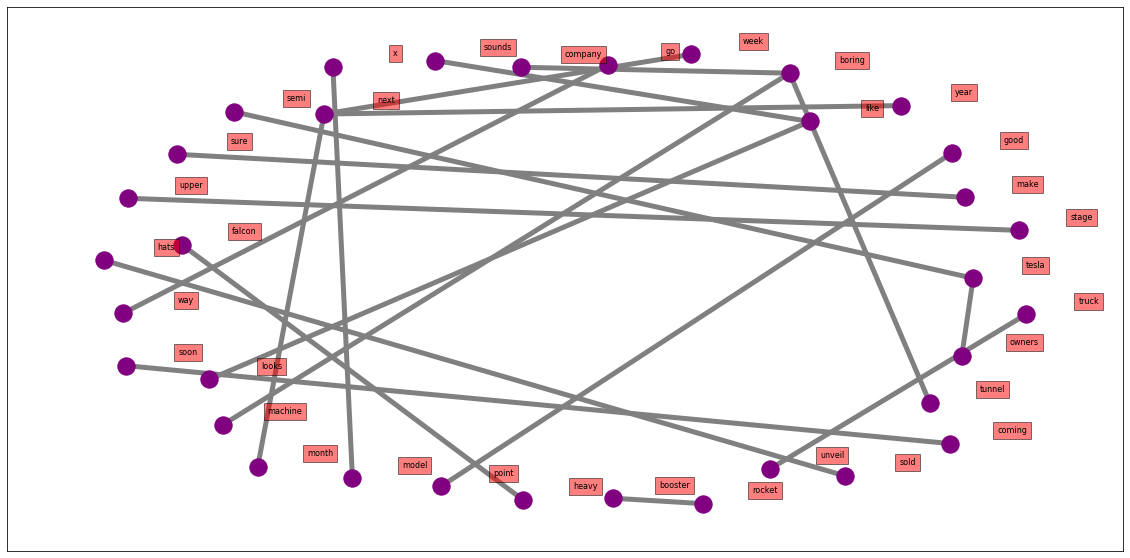

In [87]:
fig, ax = plt.subplots(figsize=(20, 10))
pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=5,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.50),
            horizontalalignment='center', fontsize=8)
    
plt.show()

In [89]:
# Extracting bi-grams for the year 2021
bigram_networks = [list(bigrams(tweet)) for tweet in data[data['year']==2021]['Tokens']]

In [90]:
# Flatten list of bigrams in clean tweets
list_bigrams = list(itertools.chain(*bigrams_network))
# Create counter of words in clean bigrams
counts_bigrams = collections.Counter(list_bigrams)

In [92]:
# Creating a bigram dataframe
df_bigram = pd.DataFrame(counts_bigrams.most_common(20),
                             columns=['bigram', 'count'])
df_bigram

,bigram,count
0,"(coming, soon)",45
1,"(falcon, heavy)",45
2,"(boring, company)",39
3,"(next, year)",30
4,"(good, point)",27
5,"(model, x)",27
6,"(next, week)",24
7,"(next, month)",21
8,"(boring, machine)",18
9,"(tesla, semi)",18


In [93]:
#creating a dictionary of the year 2021
dictionary_bigram=df_bigram.set_index('bigram').T.to_dict('records')

In [95]:
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in dictionary_bigram[0].items():
    G.add_edge(k[0], k[1])


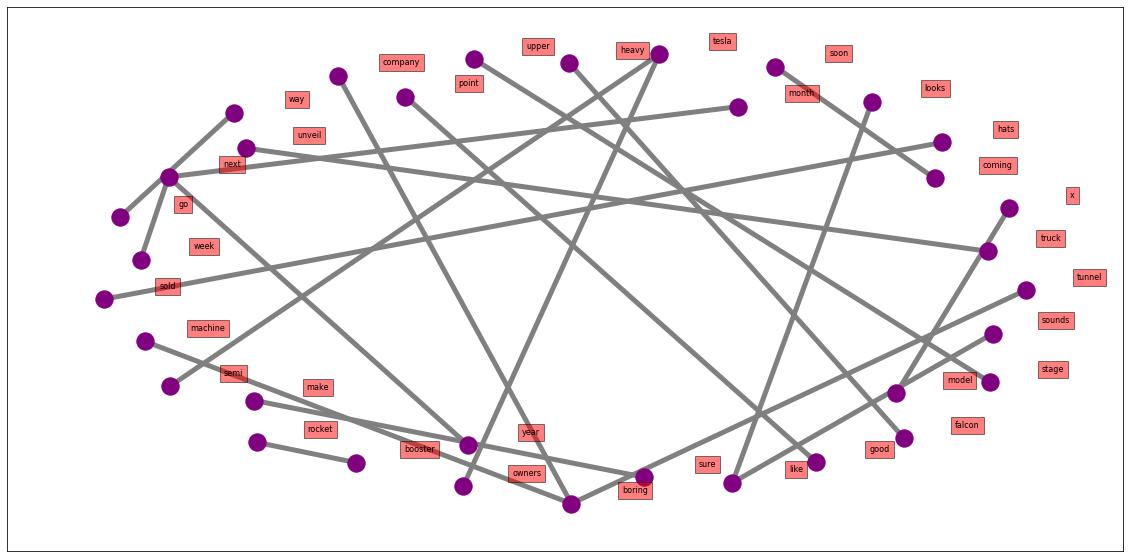

In [96]:
fig, ax = plt.subplots(figsize=(20, 10))
pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=5,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.50),
            horizontalalignment='center', fontsize=8)
    
plt.show()

In [98]:
#Extracting bi-grams for the year 2022
bigram_networks=[list(bigrams(tweet)) for tweet in data[data['year']==2022]['Tokens']]

In [99]:
# Flatten list of bigrams in clean tweets
list_bigrams = list(itertools.chain(*bigrams_network))
# Create counter of words in clean bigrams
counts_bigrams = collections.Counter(list_bigrams)

In [101]:
#creating a bigram dataframe
df_bigram = pd.DataFrame(counts_bigrams.most_common(20),
                             columns=['bigram', 'count'])
df_bigram

,bigram,count
0,"(coming, soon)",45
1,"(falcon, heavy)",45
2,"(boring, company)",39
3,"(next, year)",30
4,"(good, point)",27
5,"(model, x)",27
6,"(next, week)",24
7,"(next, month)",21
8,"(boring, machine)",18
9,"(tesla, semi)",18


In [102]:
#create a dictionary of the year 2022
dictionary_bigram=df_bigram.set_index('bigram').T.to_dict('records')

In [104]:
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in dictionary_bigram[0].items():
    G.add_edge(k[0], k[1])

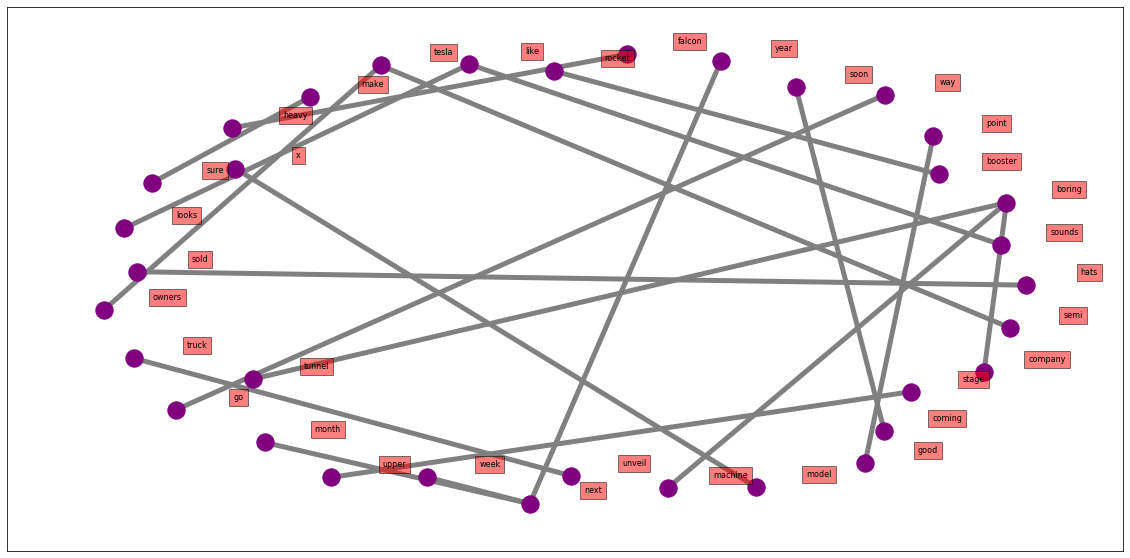

In [105]:
fig, ax = plt.subplots(figsize=(20, 10))
pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=5,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.50),
            horizontalalignment='center', fontsize=8)
    
plt.show()